1. Iris Flower Classification

Objective: Classify iris flowers into three species (Setosa, Versicolor, Virginica) based on
measurements of their petals and sepals.


Dataset: The classic Iris dataset from UCI Repository or scikit-learn.

Steps:
o Load the dataset and explore it visually (scatter plots or histograms).

o Split the data into training/test sets.

o Preprocess if needed (usually, it's already clean).

o Train a simple classifier (e.g., Logistic Regression, K-Nearest Neighbors, Decision
Tree).

o Evaluate with accuracy, precision, or confusion matrix.

Skills gained: Numeric data analysis, classification modeling, evaluating results.

In [23]:
from sklearn import datasets
iris=datasets.load_iris()

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [25]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['class']=iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


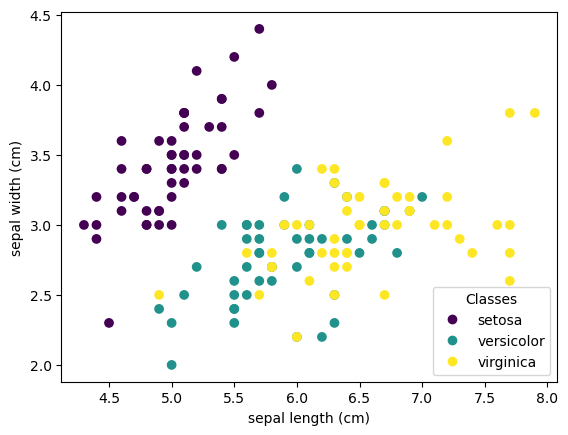

In [26]:
sc=plt.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
handles = sc.legend_elements()[0]
plt.legend(handles, iris.target_names, loc="lower right", title="Classes")


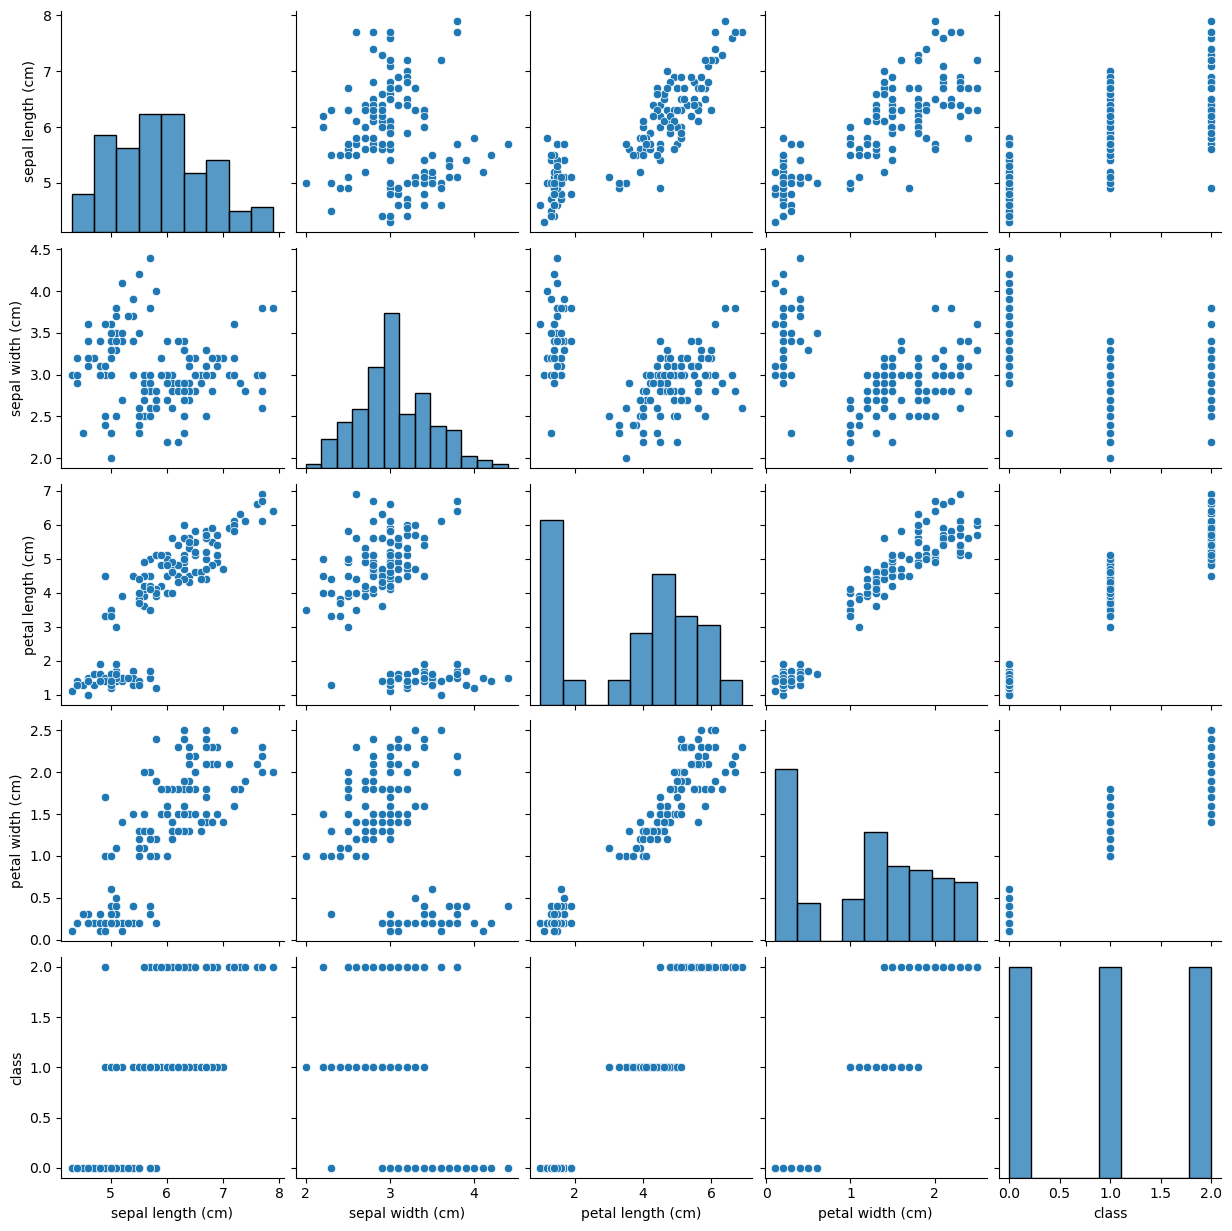

In [27]:
import seaborn as sns
sns.pairplot(df)

In [28]:
df.shape

(150, 5)

In [29]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [31]:
X=iris.data
Y=iris.target

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=42)

In [33]:
X_train.shape

(112, 4)

In [34]:
X_test.shape

(38, 4)

In [35]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)

In [36]:
X_test=scalar.transform(X_test)

In [37]:
X_test

array([[ 0.33066442, -0.55192639,  0.51683569, -0.01918559],
       [-0.15985763,  1.7460571 , -1.21973223, -1.22787777],
       [ 2.29275265, -1.01152309,  1.79031883,  1.45810485],
       [ 0.20803391, -0.32212804,  0.4010645 ,  0.3837118 ],
       [ 1.18907802, -0.55192639,  0.57472129,  0.24941267],
       [-0.52774918,  0.8268637 , -1.33550342, -1.09357864],
       [-0.28248815, -0.32212804, -0.11990588,  0.11511354],
       [ 1.31170853,  0.13746866,  0.74837808,  1.45810485],
       [ 0.45329494, -1.93071649,  0.4010645 ,  0.3837118 ],
       [-0.03722712, -0.78172474,  0.05375091, -0.01918559],
       [ 0.82118648,  0.367267  ,  0.74837808,  1.05520746],
       [-1.26353226, -0.09232969, -1.39338902, -1.49647603],
       [-0.40511866,  1.05666205, -1.45127462, -1.3621769 ],
       [-1.14090175,  0.13746866, -1.33550342, -1.49647603],
       [-0.89564072,  1.7460571 , -1.33550342, -1.22787777],
       [ 0.57592545,  0.59706535,  0.51683569,  0.51801093],
       [ 0.82118648, -0.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model=LogisticRegression(max_iter=200)

In [39]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

In [40]:
y_pred=model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [44]:
import pickle
with open("iris_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as iris_model.pkl")

Model saved as iris_model.pkl


In [43]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [45]:
sample = [[5.0, 3.5, 1.4, 0.2]]
print(model.predict(sample))

[1]
